In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 400

%matplotlib inline

In [2]:
data_directory = os.path.join('..','data','')
csv_path = os.path.join(data_directory, 'twitter_hate_speech.csv')
df_orig = pd.read_csv(csv_path, engine = 'python', delimiter = ',')

In [3]:
df_orig.columns = ['id', 'golden','state', 'trusted_judgements','last_judgment','is_hate_speech','confidence',
                   'created','orig_golden','orig_last_judgement','orig_trusted_judgements','orig_id','orig_state',
                   'updated','orig_is_hate_speech','is_hate_speech_gold','reason','confidence2','id2','text']

# Drop columns

In [304]:
df = df_orig.dropna(thresh = 68, axis = 'columns')
df = df.set_index('id')

In [305]:
df.head()

,golden,state,trusted_judgements,last_judgment,is_hate_speech,confidence,id2,text
id,,,,,,,,
853718217,True,golden,86,NaN,The tweet uses offensive language but not hate speech,0.6013,1.666196e+09,Warning: penny boards will make you a faggot
853718218,True,golden,92,NaN,The tweet contains hate speech,0.7227,4.295121e+08,Fuck dykes
853718219,True,golden,86,NaN,The tweet contains hate speech,0.5229,3.956238e+08,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot
853718220,True,golden,98,NaN,The tweet contains hate speech,0.5184,4.975147e+08,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee"
853718221,True,golden,88,NaN,The tweet uses offensive language but not hate speech,0.5185,5.889236e+08,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga


Confidence appears to have been a meaningful metric for only a third of the tweets in the dataset.

# Recode hate speech classifications

In [306]:
df = df[['text','is_hate_speech']]
categories = df.is_hate_speech.unique()
df['is_hate_speech'] = df['is_hate_speech'].replace(categories, [1,2,0])

# Things to clean up
- twitter handles
- emoticons
- urls
- newlines
- hashtags
- duplicate tweets

In [7]:
df.head()

,text,is_hate_speech
id,,
853718217,Warning: penny boards will make you a faggot,1
853718218,Fuck dykes,2
853718219,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot,2
853718220,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",2
853718221,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga,1


In [8]:
import spacy
nlp = spacy.load('en')

In [9]:
tweet = df.loc[853733878,:]['text']
parsed_tweet = nlp(tweet)
print(parsed_tweet,'\n')

for entities in parsed_tweet.ents:
    print(entities)

#YodaSpeakASaying 

Kills, captivity does.
Death @SeaWorld another 
Forget you not, we won't.
#Unna 

#OpSeaWorld https://t.co/lhcI5b0x1q 

Kills


# Generate giant text file with all tweets

In [478]:
import re

clean_tweet = lambda tweet: re.sub(r'(@\w+\s*)|#|&|\(|\)|\"|(https?://\S*)|(�\S*\d*)|(128\d{3})|(_*UNDEF)',
                      'TWITTER_HANDLE ', tweet)

In [479]:
import spacy
nlp = spacy.load('en')

In [480]:
def lemmatize(tweet):
    x = str()
    for token in nlp(tweet):
        x = ' '.join([x,token.lemma_])
    return x[1:]

In [489]:
df_clean = df.copy()
df_clean['text'] = df_clean['text'].apply(clean_tweet)
df_clean['text'] = df_clean['text'].apply(lemmatize)
df_clean.head(10)

,text,is_hate_speech
id,,
853718217,warning : penny board will make -PRON- a faggot,1
853718218,fuck dyke,2
853718219,twitter_handle twitter_handle twitter_handle twitter_handle twitter_handle at least i do not look like jefree starr faggot,2
853718220,twitter_handle twitter_handle : twitter_handle twitter_handle : twitter_handle be a fagtwitter_handle jackie jealoustwitter_handle neeeee,2
853718221,twitter_handle -PRON- hear -PRON- bitch but any way -PRON- be back th texas so wtf u talk about bitch ass nigga,1
853718222,"twitter_handle -PRON- a dirty terrorist and -PRON- religion be a fucking joke , -PRON- go around scream allah akbar do terrorist shit . dirty faggot .",2
853718223,rt twitter_handle : twitter_handle look like faggot ?,2
853718224,well -PRON- think -PRON- know actually rt twitter_handle : man why y' all do not tell -PRON- -PRON- be a dick rid ass faggot ? y'all not real twitter_handle twitter_handle twitter_handle ; twitter_handle twitter_handle twitter_handle ; twitter_handle twitter_handle twitter_handle ; twitter_handle twitter_handle twitter_handle ; twitter_handle twitter_handle twitter_handle ; twitter_handle twit...,2
853718225,"twitter_handle -PRON- know . -PRON- be a joke , faggot .",1


# Duplicate tweets need to be addressed

In [490]:
df_clean.text.value_counts()

-PRON- a lame nigga if -PRON- let another nigga opinion of -PRON- girl affect how -PRON- feel about -PRON-                                                                                                                         1
the bitch simone gtg though like first stop fatsham the other model second sit ur white ass down ur not all that                                                                                                                   1
leel be a real boy on that field still can not believe that nigga be that quick lol                                                                                                                                                1
just basically go around say twitter_handle madam , what * whatev * be this??twitter_handle                                                                                                                                        1
twitter_handle attempt to listen to -PRON- guy on iheartradio and -PRON- be play two

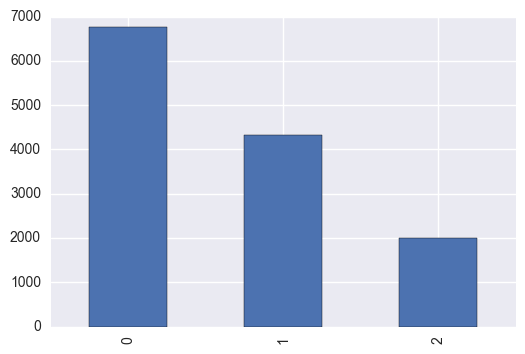

In [491]:
df_clean = df_clean.drop_duplicates(subset = 'text')
df_clean.is_hate_speech.value_counts().plot(kind = 'bar')

In [492]:
with open('../data/corpus_mlp.txt','wt') as file_out:
    for tweet in df_clean.text:
        file_out.write(tweet + '\n')

# Processing into learnable form

In [493]:
np.random.seed(1701)

from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Activation, Embedding, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [563]:
# create 50-dimensional vector embeddings for words that appear in the corpus at least 2 times
embedding_dimension = 100
model = Word2Vec([tweet.split() for tweet in df_clean.text], min_count = 2, size = embedding_dimension,
                 window = 10, sg = 1)
max_vocab_size = len(model.wv.vocab)
print('word2vec vocabulary size:', max_vocab_size)

# tokenize each tweet in the corpus. this will be useful for embedding each tweet as an index sequence vector
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(df_clean.text)
print('tokenizer vocabulary size:', tokenizer.num_words)

word2vec vocabulary size: 6383
tokenizer vocabulary size: 6383


In [564]:
# check quality of word vector embedding
model.most_similar(['trump'])

[('donald', 0.9558191299438477),
 ('muslim', 0.9442030787467957),
 ('america', 0.940565288066864),
 ('anti', 0.929354727268219),
 ('terrorist', 0.9199268817901611),
 ('akbar', 0.9178012609481812),
 ('american', 0.9157631993293762),
 ('religion', 0.9145840406417847),
 ('race', 0.9144532084465027),
 ('term', 0.9108668565750122)]

In [565]:
# create embedding matrix where each row corresponds to a vector for a word. the row index is determined by tokenizer.
embedding_matrix = np.zeros([max_vocab_size + 1, embedding_dimension])
for word, index in tokenizer.word_index.items():
    if word in model.wv.vocab:
        vector = model[word]
        embedding_matrix[index,:] = vector

print('number of words without vector embeddings:', sum(embedding_matrix.sum(axis = 1) == 0))

number of words without vector embeddings: 381


In [566]:
# convert tweets to index sequence vectors
X = tokenizer.texts_to_sequences(df_clean.text)
max_sequence_length = np.array([len(sequence) for sequence in X]).max()
print('The tweet with the longest sequence has {} indices.'.format(max_sequence_length))

# pad index sequence vectors so they all have same length and X is rectangular
X = pad_sequences(X, maxlen = max_sequence_length)
print('Matrix X has shape:', X.shape)

# create label matrix y
y = to_categorical(df_clean.is_hate_speech)
print('Labels y has shape:', y.shape)

The tweet with the longest sequence has 84 indices.
Matrix X has shape: (13089, 84)
Labels y has shape: (13089, 3)


# Build MLP

In [573]:
mlp = Sequential()
mlp.add(Embedding(embedding_matrix.shape[0],
                 embedding_matrix.shape[1],
                 weights = [embedding_matrix],
                 input_shape = (X.shape[1],)))
mlp.add(Flatten())
mlp.add(Dense(100, activation = 'relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(50, activation = 'relu'))
mlp.add(Dropout(0.1))
#mlp.add(Dense(10, activation = 'relu'))
mlp.add(Dense(3, activation = 'softmax'))
mlp.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [574]:
early_stopping = EarlyStopping(patience = 3, monitor = 'val_acc')
history = mlp.fit(X, y, validation_split = 0.3, epochs = 30, callbacks = [early_stopping] , batch_size = 200,
                 verbose = False)

training accuracy: 0.702248420499
validation accuracy: 0.696969694951


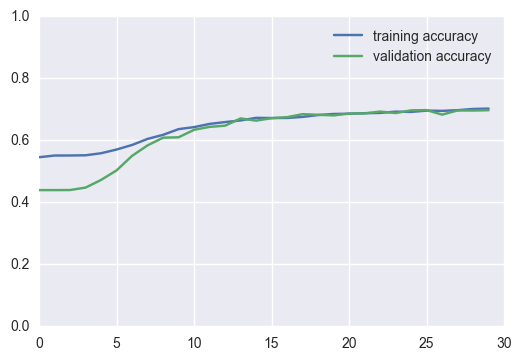

In [575]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(train_acc, label = 'training accuracy')
plt.plot(val_acc, label = 'validation accuracy')
plt.legend(loc = 0)
plt.ylim(0,1)
print('training accuracy:', train_acc[-1])
print('validation accuracy:', val_acc[-1])

- min_word: 2
    - 50 -> 10 ==> (0.708, 0.689)
    - 100 -> 10 ==> (0.730, 0.706)
    - 100 -> 10 (with 0.5 dropout) ==> (0.642, 0.689)
    - 100 -> 10 (with 0.2 dropout) ==> (0.716, 0.697)
    - 100 -> 50 ==> (0.711, 0.701)
    - 500 -> 50 ==> (0.739, 0.708)
    - 100 -> 50 -> 10 ==> (0.709, 0.706)
    - 200 -> 100 -> 20 ==> (0.729, 0.705)
    - 500 -> 200 -> 20 ==> (0.684, 0.673)
- min_word: 1
    - 100 -> 10 ==> (0.681, 0.646)
    - 100 -> 50 -> 10 ==> (0.722, 0.668)
    - 100 -> 50 -> 10 (with dropout 0.1) ==> (0.697, 0.691)

In [577]:
from sklearn.metrics import confusion_matrix, accuracy_score

def proba_to_prediction(predict_probas):
    predictions = np.array([np.argmax(row) for row in predict_probas])
    return predictions

def evaluate(y, y_pred):
    print('accuracy:', accuracy_score(y, y_pred))
    print('confusion matrix:\n', confusion_matrix(y, y_pred))

In [578]:
predict_probas = mlp.predict(X)

In [579]:
y = df_clean.is_hate_speech
y_pred = proba_to_prediction(predict_probas)
evaluate(y, y_pred)

accuracy: 0.702421880969
confusion matrix:
 [[6257  514    0]
 [1388 2937    0]
 [ 569 1424    0]]


# What if we collapse offensive and hate speech into a single category

In [580]:
y_binary = (y == 1) | (y == 2)
y_pred_binary = (y_pred == 1) | (y_pred == 2)
evaluate(y_binary, y_pred_binary)

accuracy: 0.811215524486
confusion matrix:
 [[6257  514]
 [1957 4361]]


In [581]:
def tweet_rater(tweet):
    #tweet_tokens = [token.lemma_ for token in nlp(tweet)]
    #tweet = ' '.join(tweet_tokens)
    x_vect = tokenizer.texts_to_sequences([tweet])
    x_vect = pad_sequences(x_vect, maxlen = max_sequence_length)
    probas = mlp.predict(x_vect)[0]
    rating = np.argmax(probas)
    if rating == 0:
        print('I\'m {:2.4}% sure that\'s not offensive.'.format(probas[0]*100))
    elif rating == 1:
        print('I\'m {:2.4}% sure that\'s offensive.'.format(probas[1]*100))
    else:
        print('I\'m {:2.4}% sure that\'s hate speech.'.format(probas[2]*100))

In [582]:
tweet_rater('i hate you all')

I'm 48.62% sure that's offensive.


In [583]:
df = df.reindex(df_clean.index)

# Non-offensive speech classified as offensive

In [584]:
df[(y == 0) & (y_pred == 1)]

,text,is_hate_speech
id,,
853718253,I play for keeps you play wit me its gon be yellow tape! #200,0
853719471,@Lawln @Akbar_Knows why would I hashtag my Twitter name if it was really me lol,0
853719483,@otownmarco u and caskey sound alike..I love ur style.,0
853719491,"own nightmare. What you thought you were playing and what you thought you saw, always ends up being different. Big and small channels alike",0
853719498,"Only on the 3rd ep of #AHSHotel, is there a reason for all the guys looking alike? Thought they were gonna be bros but no?",0
853719499,"All my Fam. tlk Alike \nAnswerin' Fones, \n\nIon be knowin Who Da Hell im tlkin Too _��_�۝ I",0
853719509,"Yall are savages, but they do look exactly alike tho lol https://t.co/k3mAdHEOaw",0
853719614,"@SeanTheTerrible: watch the fake upscale, high class girls call you a ""broke ashy boy"" for this...smh _�㢉�_�ۢ",0
853719616,@EnigmaticFeline the male half ghouls ashy hues gazed upon the female as she mentioned /kitten/ and it all made some sense too him now--,0


# Offensive speech classified as non-offensive

In [585]:
df[(y == 1) & (y_pred == 0)]

,text,is_hate_speech
id,,
853718236,"""I'll fuck you til you love me faggot"" - Mike Tyson",1
853718267,"RT @macktology101: ""Sunday funday"" hoe quotes",1
853718271,Emma Watson slays every single Harry Potter movie. Each film becomes her bitch.,1
853718272,"@KristyT @aliciafiasco @luciouskitty ""you know I don't know karate bitch"" loooool how am I just finding out about this now, this is amazing",1
853718278,I'm arrogant and my bitch conceited &#128520;&#128526;,1
853719450,@Independent @JoshuaAssaraf Should check it - He was secretly converted to Islam by Saddamn HouSSein in late 80's. He often says Allah Akbar,1
853719487,"@Faysal_FreeGaza depends how we define race? I still don't know what the fuck race means. For instance, not all ""brown"" ppl look alike.",1
853719500,Not All White People Are Alike :// Some Are Just Born Fucked Up. https://t.co/mukyzUvulU,1
853719534,Wallahi i only love the muslims for the sake of Allah and i hate for them what i hate for myself so i advise everyone and myself firstly,1


# Hate speech classified as non-offensive

In [586]:
df[(y == 2) & (y_pred == 0)]

,text,is_hate_speech
id,,
853718220,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",2
853718230,@MoriTaheripour shut up nigger whore! Hope u get raped by one of those animals. Might change your tune.,2
853718232,They used to tie both ends of a niggers legs to 2 different horses and beat him as the horses spread until his legs break ... Smh,2
853718237,@OxbloodStomper @PalePixie88 @SlaveCatcher88 what's your problem? Don't u know Jews control niggers? Read a book or two.,2
853719594,"Leak: 12 ISIS Terrorists ""Vetted"" &amp; Let into America - Screening Process Not Good Enough! https://t.co/E3mt7jBPnx..|v.V",2
853719705,"If TRUMP is recruiting fr IS he's actually doin INTELLIGENCE OFFICER's job, isn't he? He's diggin those bastard sympathisers outta der cells",2
853719773,@TheEricCarter @JaredWyand @cristinalaila1 YES White America is a LOT better than Muslim S Arabia. Blacks are way more racist than whites.,2
853719775,This white bitch prolly doesn't have one black female friend and if she does it is some weird emo black trying to tell me about blacks.,2
853719914,_�㢉���� hongkongslut: Meko Fung looking like a horny anal worn out chink looking into the camera while toying... https://t.co/NiJOkrXFyv,2
